In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import wordcloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [ ]:
# reading our data
reviews = pd.read_csv('bristishairwaysreview.csv')
reviews.head()

reviews             date  \
0  ✅ Trip Verified |  I had the most fantastic BA...  1st August 2023   
1  ✅ Trip Verified |  Couldn’t book in online. Ar...   31st July 2023   
2  ✅ Trip Verified | London Heathrow to Mumbai in...   31st July 2023   
3  ✅ Trip Verified | Keflavík, Iceland to London ...   31st July 2023   
4  ✅ Trip Verified | Terrible Experience with Bri...   29th July 2023   

          country       seat_type recommended  stars                  route  \
0       Hong Kong  Business Class         yes      5  Heathrow to Las Vegas   
1  United Kingdom   Economy Class          no      3       Rome to Heathrow   
2         Iceland  Business Class         yes      3      Gatwick to Venice   
3         Iceland  Business Class         yes      5       London to Luanda   
4          Canada   Economy Class          no      5     Denver to Heathrow   

  type_of_traveller  
0    Family Leisure  
1      Solo Leisure  
2      Solo Leisure  
3    Couple Leisure  
4    Family Leisure

In [ ]:
reviews.describe()

stars
count  2500.000000
mean      4.272000
std       2.135378
min       1.000000
25%       3.000000
50%       3.000000
75%       5.000000
max       9.000000

In [1]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()



LookupError: ignored

In [ ]:
# To generate polarity scores for the reviews in the datasets
# extract the values from the dictionaryand create new columns within our dataframe

reviews['compounds'] = [sentiment.polarity_scores(review)['compound'] for review in reviews['reviews']]
reviews['neg'] = [sentiment.polarity_scores(review)['neg'] for review in reviews['reviews']]
reviews['neu'] = [sentiment.polarity_scores(review)['neu'] for review in reviews['reviews']]
reviews['pos'] = [sentiment.polarity_scores(review)['pos'] for review in reviews['reviews']]

In [ ]:
reviews.head()

reviews             date  \
0  ✅ Trip Verified |  I had the most fantastic BA...  1st August 2023   
1  ✅ Trip Verified |  Couldn’t book in online. Ar...   31st July 2023   
2  ✅ Trip Verified | London Heathrow to Mumbai in...   31st July 2023   
3  ✅ Trip Verified | Keflavík, Iceland to London ...   31st July 2023   
4  ✅ Trip Verified | Terrible Experience with Bri...   29th July 2023   

          country       seat_type recommended  stars                  route  \
0       Hong Kong  Business Class         yes      5  Heathrow to Las Vegas   
1  United Kingdom   Economy Class          no      3       Rome to Heathrow   
2         Iceland  Business Class         yes      3      Gatwick to Venice   
3         Iceland  Business Class         yes      5       London to Luanda   
4          Canada   Economy Class          no      5     Denver to Heathrow   

  type_of_traveller  compounds    neg    neu    pos  
0    Family Leisure     0.9927  0.014  0.756  0.229  
1      Solo Leisure     0.5709  0.077  0.797  0.125  
2      Solo Leisure     0.9708  0.057  0.746  0.197  
3    Couple Leisure    -0.2263  0.067  0.874  0.060  
4    Family Leisure    -0.4365  0.040  0.930  0.030

In [ ]:
reviews[['compounds','neg','neu','pos']].describe()

compounds          neg          neu          pos
count  2500.000000  2500.000000  2500.000000  2500.000000
mean      0.111610     0.080454     0.815056     0.104493
std       0.782271     0.053003     0.070155     0.077203
min      -0.997400     0.000000     0.453000     0.000000
25%      -0.771700     0.042000     0.772000     0.048000
50%       0.318100     0.074000     0.820000     0.088000
75%       0.913700     0.110250     0.865000     0.145000
max       0.999200     0.338000     1.000000     0.479000

<Axes: xlabel='compounds', ylabel='Count'>

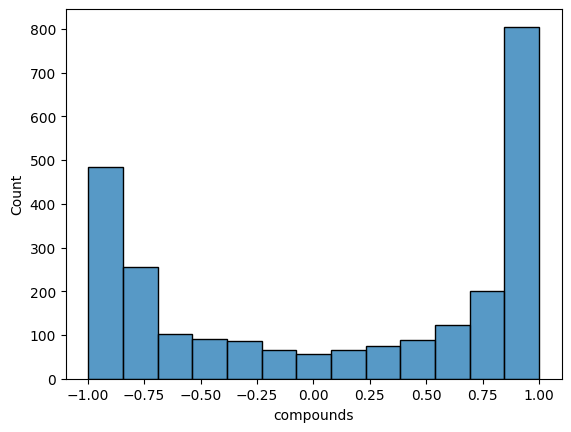

In [ ]:
sns.histplot(reviews['compounds'])

<Axes: xlabel='pos', ylabel='Count'>

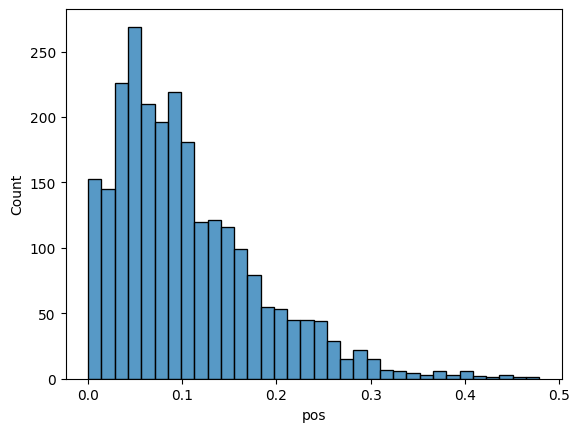

In [ ]:
# distribution of the positive scores

sns.histplot(reviews['pos'])

<Axes: xlabel='neg', ylabel='Count'>

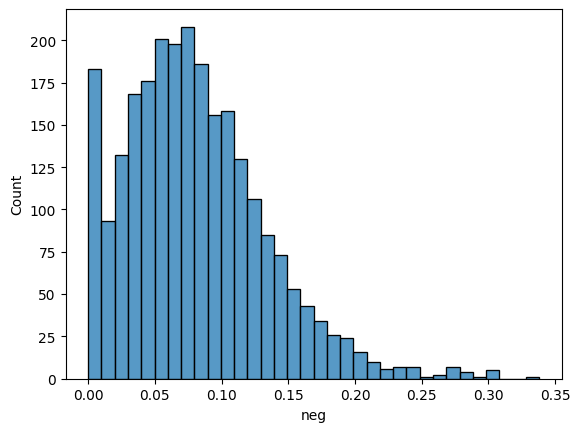

In [ ]:
# viewing the distribution of the negative scores

sns.histplot(reviews['neg'])

<Axes: xlabel='neu', ylabel='Count'>

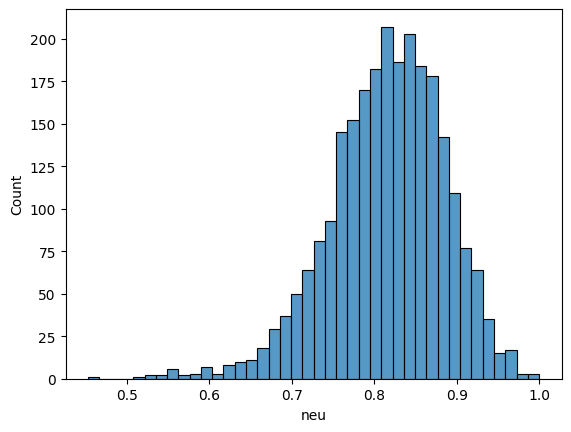

In [ ]:
# Viewing the neutral score

sns.histplot(reviews['neu'])

In [ ]:
# Determining how many negative reviews we have per seat_type

(reviews['compounds']<=0).groupby(reviews['seat_type']).sum()

seat_type
Business Class     316
Economy Class      662
First Class         39
Premium Economy    105
Name: compounds, dtype: int64

In [ ]:
# Determing how many negative reviews we have per type of traveller

(reviews['compounds']<=0).groupby(reviews['type_of_traveller']).sum()

type_of_traveller
Business          217
Couple Leisure    435
Family Leisure    235
Solo Leisure      235
Name: compounds, dtype: int64

In [ ]:
# looking at the percentage negative reviews per seat type.

percent_negative = pd.DataFrame((reviews['compounds']<=0).groupby(reviews['seat_type']).sum()
/reviews['seat_type'].groupby(reviews['seat_type']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')
percent_negative


% negative reviews
seat_type                          
First Class               28.888889
Business Class            41.909814
Premium Economy           42.338710
Economy Class             48.569332

In [ ]:
# Also look at the percentage negative reviews per type of traveller

percent_negative2 = pd.DataFrame((reviews['compounds']<=0).groupby(reviews['type_of_traveller']).sum()
/reviews['type_of_traveller'].groupby(reviews['type_of_traveller']).count()*100,
                                columns=['% negative reviews']).sort_values(by='% negative reviews')
percent_negative2




% negative reviews
type_of_traveller                    
Business                         43.4
Couple Leisure                   43.5
Family Leisure                   47.0
Solo Leisure                     47.0

In [ ]:
# Ploting Horizontal barplot to view graphically

sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')

<Axes: xlabel='% negative reviews', ylabel='seat_type'>

<Axes: xlabel='% negative reviews', ylabel='type_of_traveller'>

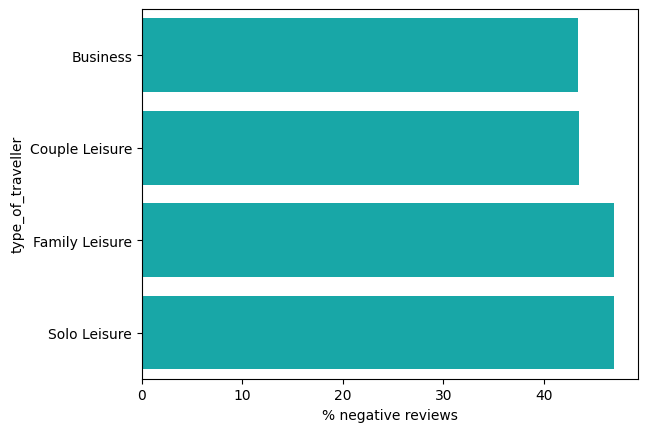

In [ ]:
# Plot the Horinzontal bar of the percent negative reviews of the type of traveller

sns.barplot(data=percent_negative2, x='% negative reviews', y=percent_negative2.index, color='c')


In [ ]:
# To understand the words most frequently used in the reviews of the economy class type of seat
# Lets process the text data for wordcloud visualization

reviews['processed_review'] = reviews['reviews']
reviews_positive_subset = reviews.loc[(reviews['seat_type']=='Economy Class') & (reviews['compounds']>0),:]

reviews_negative_subset = reviews.loc[(reviews['seat_type']=='Economy Class') & (reviews['compounds']<=0),:]
reviews_positive_subset.head()

reviews            date  \
1   ✅ Trip Verified |  Couldn’t book in online. Ar...  31st July 2023   
9   ✅ Trip Verified | A simple story with an unfor...  21st July 2023   
10  ✅ Trip Verified |  Flight was delayed due to t...  21st July 2023   
12  ✅ Trip Verified |  I don't understand why Brit...  20th July 2023   
13  Not Verified |  I'm sure that BA have graduall...  20th July 2023   

           country      seat_type recommended  stars                  route  \
1   United Kingdom  Economy Class          no      3       Rome to Heathrow   
9          Germany  Economy Class          no      7             BLR to LHR   
10  United Kingdom  Economy Class          no      3  Heathrow to Las Vegas   
12  United Kingdom  Economy Class          no      3      Gatwick to Venice   
13  United Kingdom  Economy Class          no      3       London to Luanda   

   type_of_traveller  compounds    neg    neu    pos  \
1       Solo Leisure     0.5709  0.077  0.797  0.125   
9           Business     0.3200  0.072  0.852  0.076   
10    Family Leisure     0.2598  0.076  0.857  0.067   
12      Solo Leisure     0.9723  0.000  0.811  0.189   
13    Couple Leisure     0.7025  0.094  0.796  0.110   

                                     processed_review  
1   ✅ Trip Verified |  Couldn’t book in online. Ar...  
9   ✅ Trip Verified | A simple story with an unfor...  
10  ✅ Trip Verified |  Flight was delayed due to t...  
12  ✅ Trip Verified |  I don't understand why Brit...  
13  Not Verified |  I'm sure that BA have graduall...

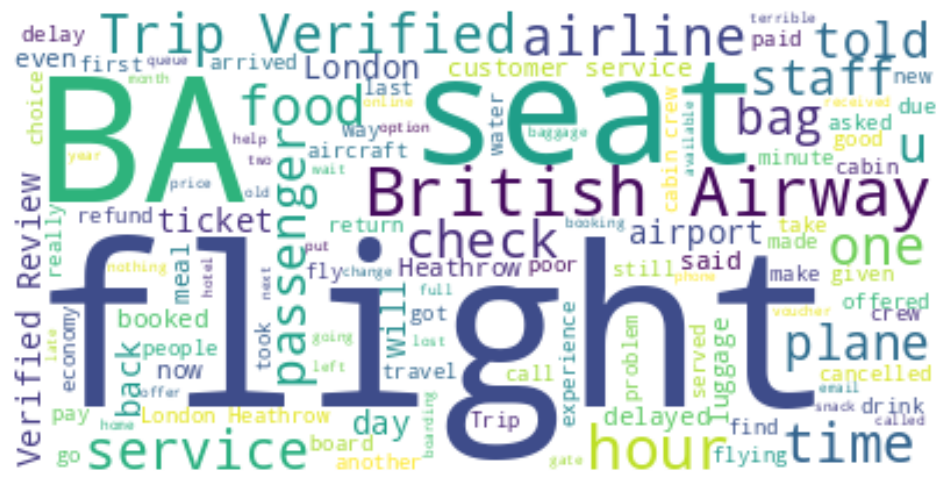

In [ ]:
# wordcloud  of words from negative reviews by seat type

neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = wordcloud.WordCloud(background_color='white').generate_from_text(''.join(neg_tokens))

# Display the image;

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

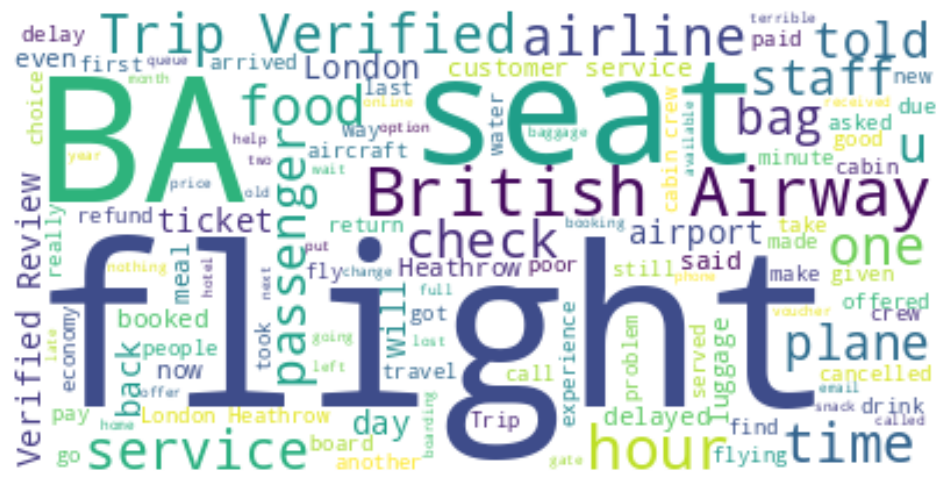

In [ ]:
# Wordcloud for positive reviews

from wordcloud import WordCloud

pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

WordCloud = WordCloud(background_color='white').generate_from_text(''.join(pos_tokens))

# Display the image;

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
# To understand word frequencies, used freqDist from NLTK
# using nltk freqdist and tabulate

from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

            e      t      a      o      i      n      r      s      h 
108254  56367  40803  38509  34302  31018  30564  28787  26194  22541 


In [ ]:
from nltk.probability import FreqDist
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

            e      t      a      o      n      i      r      s      h 
110466  56839  42308  37910  35801  31143  30859  28522  25568  23350 


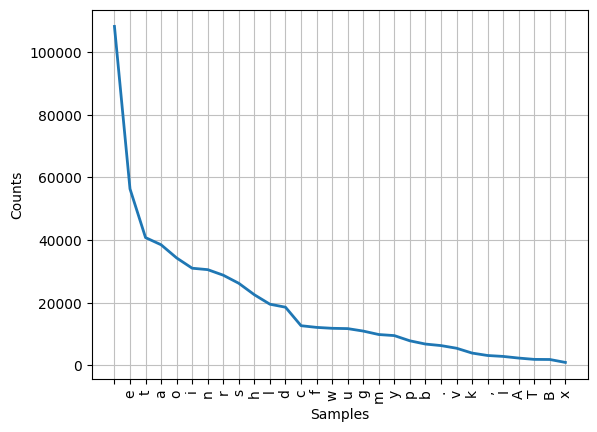

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
# creating a frequency distribution plot
pos_freqdist.plot(30)

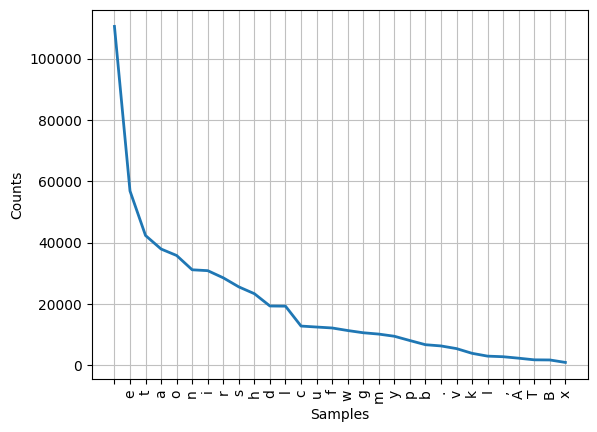

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
neg_freqdist.plot(30)